In [1]:
#import all the necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the dataset from remote machine 

In [4]:
A = pd.read_csv("C:/Users/vipul ghare/Desktop/ETL Hive/csvfiles/sidhardhan/Regression/gld_price_data.csv")

In [5]:
#preview the dataset

In [6]:
A.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
#Get information about the dataset

In [8]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#describe funcstion will tell you more about the dataset

In [10]:
A.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
#Dropping unnecessary columns 

In [12]:
A=A.drop(labels=["Date"],axis=1)

In [13]:
#check for any null value

In [14]:
A.isna().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
#Exploratory Data Analysis(EDA)

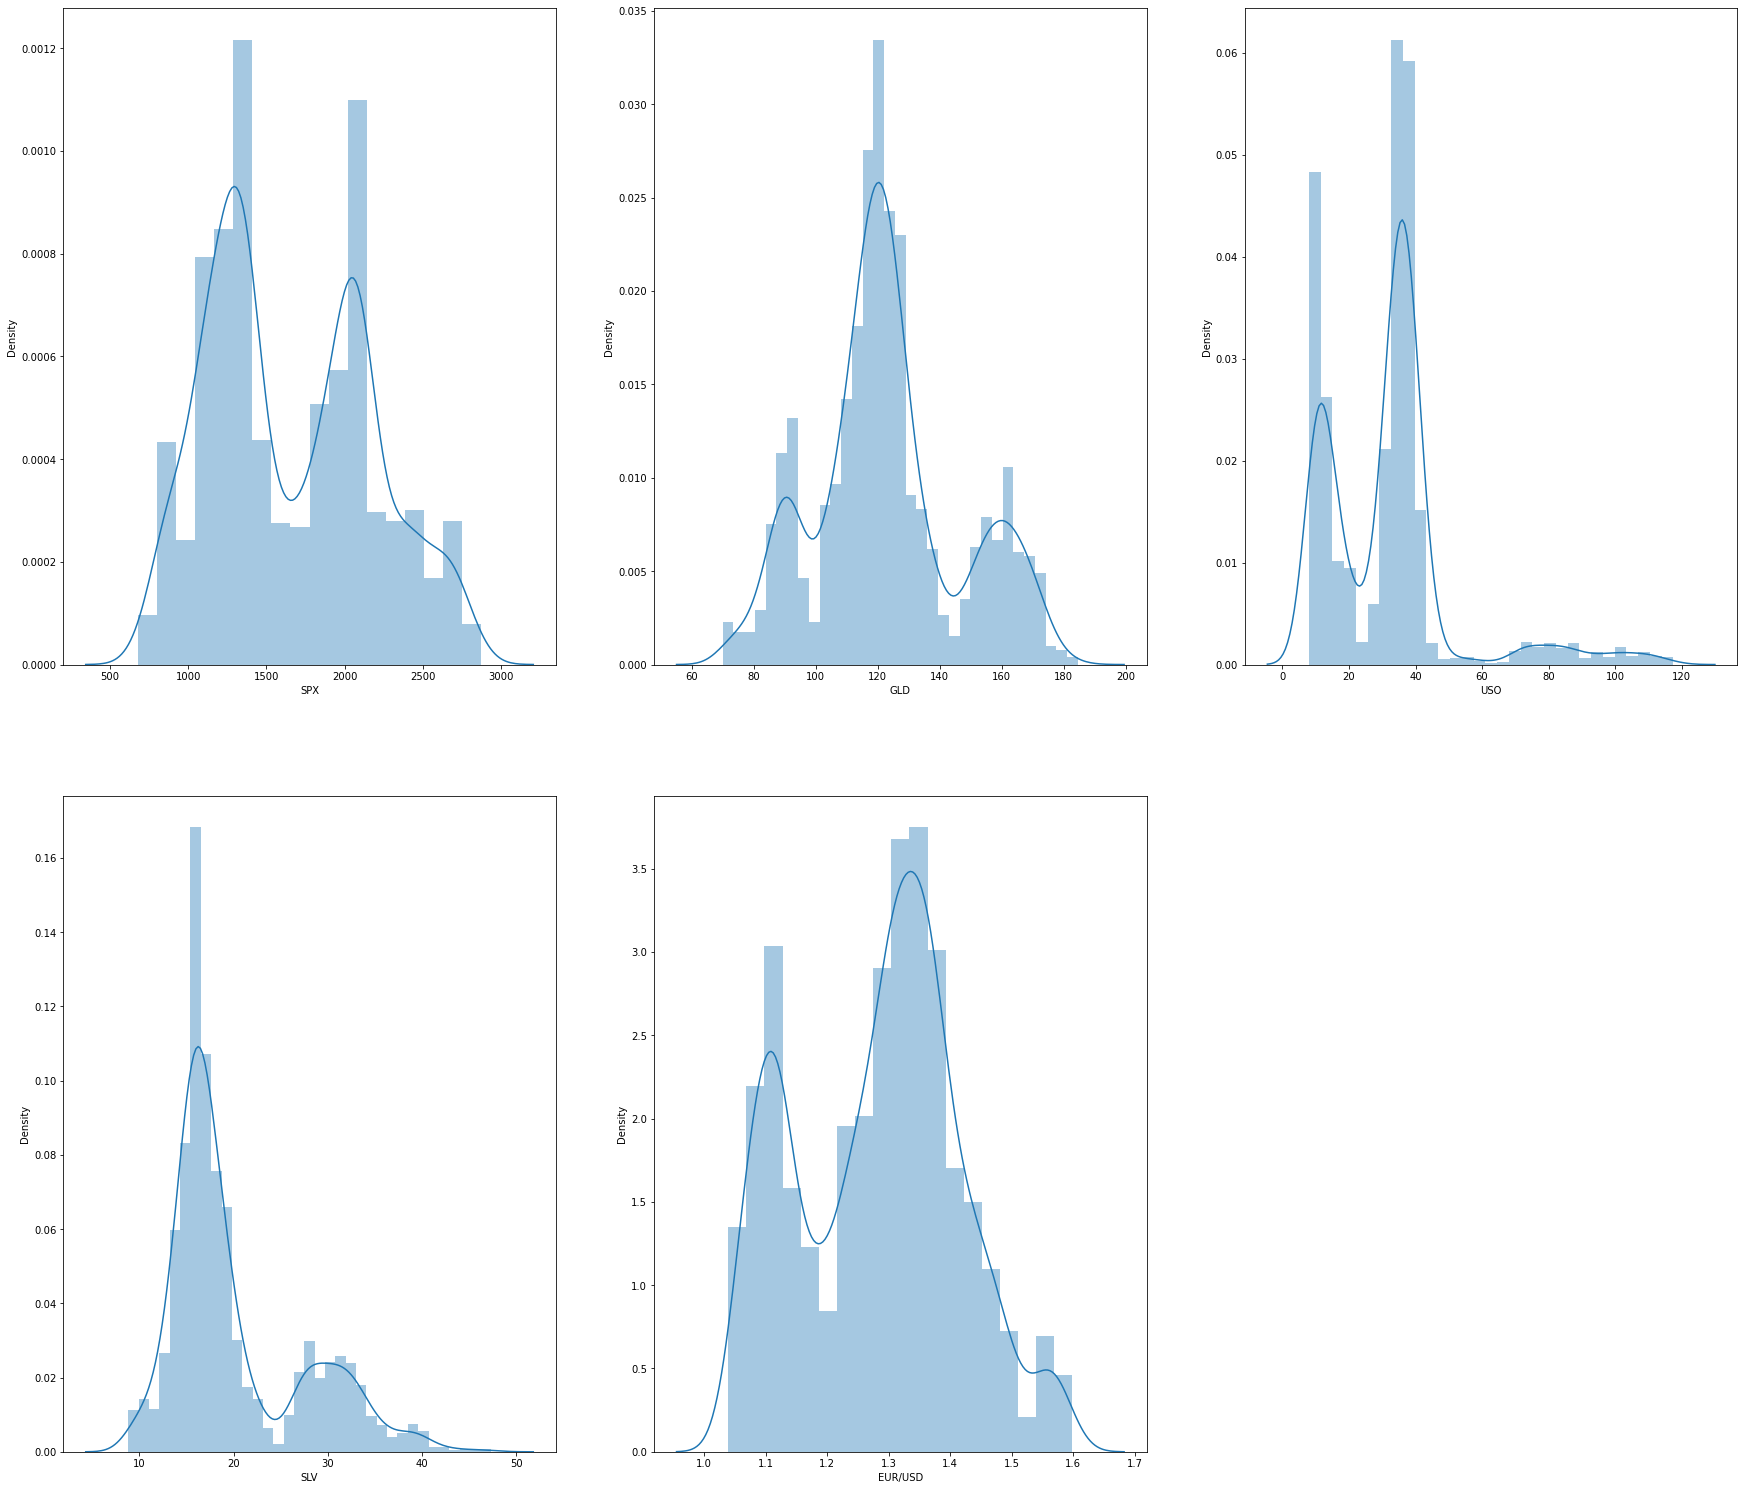

In [16]:
plt.figure(figsize=(30,70))
m = 1
for i in A.columns:
    plt.subplot(A.shape[1],3,m)
    if(A[i].dtypes=="object"):
        sb.countplot(A[i])
    else:
        sb.distplot(A[i])
    m = m + 1

In [17]:
#Declare Predictor and Target varibale

In [18]:
Y=A[["GLD"]]

In [26]:
X = A.drop(labels=["GLD"],axis = 1)

In [27]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [28]:
from sklearn.preprocessing import StandardScaler #standarize the data
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [29]:
X

,SPX,USO,SLV,EUR/USD
0,-0.399145,2.388810,-0.691720,1.429753
1,-0.399145,2.383687,-0.676912,1.451035
2,-0.467604,2.329381,-0.693553,1.458646
3,-0.458837,2.236652,-0.709630,1.403954
4,-0.508915,2.265342,-0.633900,2.079145
...,...,...,...,...
2285,1.960708,-0.911009,-0.645182,-0.736505
2286,2.010555,-0.895128,-0.642361,-0.752222
2287,2.059264,-0.893078,-0.612747,-0.698761
2288,2.072867,-0.894615,-0.638131,-0.688383


In [30]:
#split the data in training and testing data

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)

In [32]:
# Fitting Random Forest Regressor to the Training set

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
model = rfr.fit(xtrain,ytrain)
model.predict(xtest)

array([167.73989935, 145.25869826, 160.22409711, 108.10019826,
       142.62960024, 108.77969842, 114.24799928, 119.98420045,
        84.81839995, 125.32909995, 115.22890089, 108.65179882,
       154.79920162, 115.47570034, 118.43539963, 102.41729915,
       119.58970096, 115.72820003, 122.25989882, 166.96170183,
       104.7201992 , 151.80680084, 108.58059948, 119.97780007,
       119.08179946, 120.16619949,  90.95440169, 127.4030995 ,
       127.67660132, 110.0482995 , 121.60399961, 122.00362501,
       121.0339005 ,  71.17040035, 108.30819995,  85.2954983 ,
       133.471099  , 161.23579761, 121.67389896, 115.3034    ,
       140.15029747, 167.64150014, 116.21150071, 120.9047017 ,
       154.61340182, 166.39749974, 161.04170046, 113.88720056,
       133.81430134,  82.71530126,  92.33970054, 118.52179856,
       126.75999864,  92.19259882,  71.64890109, 119.57580095,
        91.03210048,  92.3405994 , 119.91849889, 146.60749655,
       159.49090035, 112.68059927,  94.34330176, 127.59

In [37]:
pred_ts = model.predict(xtest)

In [38]:
pred_tr = model.predict(xtrain)

In [34]:
#Calculation of Accuracy of the model

In [43]:
from sklearn.metrics import mean_squared_error
print("Training error :",mean_squared_error(ytrain,pred_tr))
print("Testing error :",mean_squared_error(ytest,pred_ts))

Training error : 0.9344793858856719
Testing error : 6.475099351726089
